# The Challenge

Stakeholders have supplied you a list of 500 companies and would like you to create some draft visualisations for their upcoming online publication.  

They have requested the following charts:  
• A scatterplot classified by industry showing revenue, expenses, profit  
• A scatterplot that includes industry trends for the expenses~revenue relationship  
• BoxPlots showing growth by industry  

# Import Data Into R

Since we don't expect empty strings to represent completed data, we will tell R to treat empty strings as NA values.

In [107]:
fin <- read.csv("Future-500.csv", na.strings=c(""))

In [108]:
head(fin)

ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,Over-Hex,Software,2006,25,TN,Franklin,"$9,684,527","1,130,700 Dollars",8553827,19%
2,Unimattax,IT Services,2009,36,PA,Newtown Square,"$14,016,543","804,035 Dollars",13212508,20%
3,Greenfax,Retail,2012,NA,SC,Greenville,"$9,746,272","1,044,375 Dollars",8701897,16%
4,Blacklane,IT Services,2011,66,CA,Orange,"$15,359,369","4,631,808 Dollars",10727561,19%
5,Yearflex,Software,2013,45,WI,Madison,"$8,567,910","4,374,841 Dollars",4193069,19%
6,Indigoplanet,IT Services,2013,60,NJ,Manalapan,"$12,805,452","4,626,275 Dollars",8179177,22%


In [109]:
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: int  2006 2009 2012 2011 2013 2013 2009 2013 2009 2010 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14 18 12 NA 26 16 ...


In [110]:
summary(fin)

       ID                        Name                   Industry  
 Min.   :  1.0   Abstractedchocolat:  1   IT Services       :146  
 1st Qu.:125.8   Abusivebong       :  1   Health            : 86  
 Median :250.5   Acclaimedcirl     :  1   Software          : 64  
 Mean   :250.5   Admitruppell      :  1   Financial Services: 54  
 3rd Qu.:375.2   Admonishbadelynge :  1   Construction      : 50  
 Max.   :500.0   Ahemparticular    :  1   (Other)           : 98  
                 (Other)           :494   NA's              :  2  
   Inception      Employees           State              City    
 Min.   :1999   Min.   :   1.00   CA     : 57   San Diego  : 13  
 1st Qu.:2009   1st Qu.:  27.25   VA     : 50   New York   : 11  
 Median :2011   Median :  56.00   TX     : 47   Reston     : 10  
 Mean   :2010   Mean   : 148.61   FL     : 34   Houston    :  9  
 3rd Qu.:2012   3rd Qu.: 126.00   MD     : 25   Austin     :  8  
 Max.   :2014   Max.   :7125.00   (Other):283   Minneapolis:  8  
 N

After a quick look at the data, we see that the dataset has numerous discrepancies that need to be addressed before analysis can be performed.

For example, R assumed an incorrect data type for the ID column.

# Fixing column type: int -> factor

After checking the structure of the fin DataFrame, we learn that R has recognized the ID column as an integer type. However, we know that the ID column should be treated as a factor type, since we won't be performing arithmetic on the column.

The same fix has to be done on the Inception column.

In [111]:
# Changing from non-factor to factor:

fin$ID <- factor(fin$ID)

In [112]:
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: int  2006 2009 2012 2011 2013 2013 2009 2013 2009 2010 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14 18 12 NA 26

In [113]:
fin$Inception <- factor(fin$Inception)

In [114]:
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14

# Fixing column type: factor -> int

R doesn't allow a user to simply change a factor into an integer. If this is attempted, the resulting vector of integers isn't a numeric version of the original data, but rather the numeration R used for the factor levels.

E.g. 

z = factor(c("12", "13", "14", "15"))  
z = as.numeric(z)  
z  

This would return the vector [1, 2, 3, 4], representing the 4 unique levels for the original factor vector. To get the vector [12, 13, 14, 15], one would convert the column in the following manner: factor -> char -> int.

# gsub() and sub()

Converting Revenue, Growth and Expenses into numerics instead of factors.

sub() and gsub() help with pattern matching and replacing. Sub replaces first instance, gsub() replaces all

In [115]:
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14

In the Revenue column, we have to rid the data of the commas, and the dollar signs.

In the Expenses column, we have to rid the data of the commas, and the " Dollars" text before we convert it to a numeric column.

In the Growth column, we have to rid the data of the percentage signs.

In [116]:
fin$Revenue = gsub("\\$", "", fin$Revenue)
fin$Revenue = gsub(",", "", fin$Revenue)

fin$Expenses = gsub(",", "", fin$Expenses)
fin$Expenses = gsub(" Dollars", "", fin$Expenses)

fin$Growth = gsub("%", "", fin$Growth)
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : chr  "9684527" "14016543" "9746272" "15359369" ...
 $ Expenses : chr  "1130700" "804035" "1044375" "4631808" ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : chr  "19" "20" "16" "19" ...


After stripping the misc. characters, R recognizes the factor as a char type instead of a factor. Now we can convert the columns into numerics.

In [117]:
fin$Revenue = as.numeric(fin$Revenue)
fin$Expenses = as.numeric(fin$Expenses)
fin$Growth = as.numeric(fin$Growth)

str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : num  9684527 14016543 9746272 15359369 8567910 ...
 $ Expenses : num  1130700 804035 1044375 4631808 4374841 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : num  19 20 16 19 19 22 17 NA 30 20 ...


# Dealing with Missing Data

A common way to deal with missing numerical data is to replace it with the mean or median. We will use the median for the times where outliers occur since the median is minimally influenced by outliers.

In [118]:
head(fin, 24)

ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,Over-Hex,Software,2006,25,TN,Franklin,9684527,1130700,8553827,19
2,Unimattax,IT Services,2009,36,PA,Newtown Square,14016543,804035,13212508,20
3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
4,Blacklane,IT Services,2011,66,CA,Orange,15359369,4631808,10727561,19
5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
6,Indigoplanet,IT Services,2013,60,NJ,Manalapan,12805452,4626275,8179177,22
7,Treslam,Financial Services,2009,116,MO,Clayton,5387469,2127984,3259485,17
8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
9,Lamtone,IT Services,2009,55,CA,San Ramon,11757018,6482465,5274553,30
10,Stripfind,Financial Services,2010,25,FL,Boca Raton,12329371,916455,11412916,20


In the top 24 rows of data, we can already see that missingness is an issue with this data. To locate all rows, we can use the negation of the complete.cases(fin) vector to subset the dataset. For intuition, here is the complete.cases(fin) vector:

In [119]:
head(complete.cases(fin))

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

This tells us that the first 2 rows are complete, i.e. have no NA's, the third is incomplete, and the remaining are complete. We want the negation of this; we want a vector where TRUE represents incomplete rows.

In [120]:
fin[!complete.cases(fin),] # Get the TRUE/FALSE vector, and negate it to return the FALSE rows.

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
11,11,Canecorporation,Health,2012,6,NA,New York,10597009,7591189,3005820,7
14,14,Techline,NA,2006,65,CA,San Ramon,13898119,5470303,8427816,23
15,15,Cityace,NA,2010,25,CO,Louisville,9254614,6249498,3005116,6
17,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
22,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
44,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9
84,84,Drilldrill,Software,2010,30,NA,San Francisco,7800620,2785799,5014821,17
267,267,Circlechop,Software,2010,14,NA,San Francisco,9067070,5929828,3137242,20


# Removing records with missing data

Since our analyses will be heavily dependent on the Industry column, and we can't populate the incomplete records by Googling for the missing information since the dataset is fake, we have to remove an entire record if it has missing data in the Industry column.

We will make a backup of the dataset since we are making significant changes.

In [121]:
fin_backup = fin  # In case we mess up the data

Instead of removing unwanted records from the dataset, we can make a subset of the desired records. That is, subset by the negation of the is.na(fin$Industry) vector.

In [122]:
fin[is.na(fin$Industry),]
fin[!is.na(fin$Industry),]  # Opposite
fin = fin[!is.na(fin$Industry),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
14,14,Techline,NA,2006,65,CA,San Ramon,13898119,5470303,8427816,23
15,15,Cityace,NA,2010,25,CO,Louisville,9254614,6249498,3005116,6


,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,1,Over-Hex,Software,2006,25,TN,Franklin,9684527,1130700,8553827,19
2,2,Unimattax,IT Services,2009,36,PA,Newtown Square,14016543,804035,13212508,20
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
4,4,Blacklane,IT Services,2011,66,CA,Orange,15359369,4631808,10727561,19
5,5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
6,6,Indigoplanet,IT Services,2013,60,NJ,Manalapan,12805452,4626275,8179177,22
7,7,Treslam,Financial Services,2009,116,MO,Clayton,5387469,2127984,3259485,17
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
9,9,Lamtone,IT Services,2009,55,CA,San Ramon,11757018,6482465,5274553,30
10,10,Stripfind,Financial Services,2010,25,FL,Boca Raton,12329371,916455,11412916,20


# Resetting the dataframe index

Since we removed a few records from the dataset, we must reset the DataFrame's indexing because R doesn't do this automatically like Microsoft Excel would.

It still appears that the DataFrame has its original 500 records, which we know is false. Rows 14 and 15 are removed.

In [123]:
tail(fin)

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
495,495,Rawfishcomplete,Financial Services,2012,124,CA,Los Angeles,10624949,2951178,7673771,22
496,496,Buretteadmirable,IT Services,2009,93,ME,Portland,15407450,2833136,12574314,25
497,497,Inventtremendous,Construction,2009,24,MN,Woodbury,9144857,4755995,4388862,11
498,498,Overviewparrot,Retail,2011,7125,TX,Fort Worth,11134728,5152110,5982618,12
499,499,Belaguerra,IT Services,2010,140,MI,Troy,17387130,1387784,15999346,23
500,500,Allpossible,IT Services,2011,24,CA,Los Angeles,11949706,689161,11260545,24


In [124]:
rownames(fin) = NULL  # Reset index
tail(fin)

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
493,495,Rawfishcomplete,Financial Services,2012,124,CA,Los Angeles,10624949,2951178,7673771,22
494,496,Buretteadmirable,IT Services,2009,93,ME,Portland,15407450,2833136,12574314,25
495,497,Inventtremendous,Construction,2009,24,MN,Woodbury,9144857,4755995,4388862,11
496,498,Overviewparrot,Retail,2011,7125,TX,Fort Worth,11134728,5152110,5982618,12
497,499,Belaguerra,IT Services,2010,140,MI,Troy,17387130,1387784,15999346,23
498,500,Allpossible,IT Services,2011,24,CA,Los Angeles,11949706,689161,11260545,24


# Replace missing data: factual analysis method

For records with missing data in the State column, we can easily populate the record by using the City column. We just need to Google which state the city is in.

In [125]:
fin[is.na(fin$State),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
11,11,Canecorporation,Health,2012,6,NA,New York,10597009,7591189,3005820,7
82,84,Drilldrill,Software,2010,30,NA,San Francisco,7800620,2785799,5014821,17
265,267,Circlechop,Software,2010,14,NA,San Francisco,9067070,5929828,3137242,20
377,379,Stovepuck,Retail,2013,73,NA,New York,13814975,5904502,7910473,10


The records with missing data in the State column are from the cities of New York and San Francisco.

We know that the city of New York is in the state of New York, and the city of San Francisco is in the state of California.

In [126]:
fin[is.na(fin$State) & fin$City=="New York", "State"] = "NY"
fin[is.na(fin$State) & fin$City=="San Francisco", "State"] = "CA"

fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9
330,332,Westminster,Financial Services,2010,NA,MI,Troy,11861652,5245126,6616526,15


# Replace missing data: median imputation method (part 1)

Let's take at the remaining incomplete rows.

In [127]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9
330,332,Westminster,Financial Services,2010,NA,MI,Troy,11861652,5245126,6616526,15


We can proxy the null values in the Employees column by the median. We can go one step further and take the median number of Employees for each Industry.

The reason for using the median in this case is because we know that there are outliers, for which the mean will be significantly influenced by. The median is more robust to outliers, as demonstrated below:

In [128]:
median(fin[,"Employees"], na.rm=TRUE)

[1] 56

In [129]:
mean(fin[,"Employees"], na.rm=TRUE)

[1] 149.0282

Let's take the median number of Employees in the retail Industry.

In [130]:
med_empl_retail = median(fin[fin$Industry=="Retail","Employees"], na.rm=TRUE)

In [131]:
med_empl_retail

[1] 28

We can now proxy the null Employees value for records whose Industry is in Retail.

In [132]:
fin[is.na(fin$Employees) & fin$Industry=="Retail","Employees"] = med_empl_retail

In [133]:
fin[3,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,28,SC,Greenville,9746272,1044375,8701897,16


Now let's do the same proxy method for the Financial Services Industry.

In [134]:
med_empl_service = median(fin[fin$Industry=="Financial Services","Employees"], na.rm=TRUE)
med_empl_service

[1] 80

In [135]:
fin[is.na(fin$Employees) & fin$Industry=="Financial Services","Employees"] = med_empl_retail

We will also do the same proxy method for the Growth column, using the median Growth values for each Industry.

In [136]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9


In [137]:
med_growth_constr = median(fin[fin$Industry=="Construction", "Growth"], na.rm=TRUE)

In [138]:
med_growth_constr

[1] 10

In [139]:
fin[is.na(fin$Growth) & fin$Industry=="Construction","Growth"] = med_growth_constr

# Replacing missing data: Median imputation method (part 3)

In [140]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,10
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9


For row 15, we don't need to proxy anything. Since the only null is in the Expenses column, we can calculate for Expenses using Revenue - Profit.

We note that the remaining incomplete records have null values in the  Revenue, Expenses and Profit columns. However, since Profit is a function of both Revenue and Expenses, we don't need to proxy it.

Our plan of attack is to proxy the Revenue and Expenses column, and then calculate Profit.

In [141]:
med_rev_constr = median(fin[fin$Industry=="Construction", "Revenue"], na.rm=TRUE)

In [142]:
med_rev_constr

[1] 9055059

In [143]:
fin[is.na(fin$Revenue) & fin$Industry=="Construction", "Revenue"] = med_rev_constr

In [144]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,9055059,NA,NA,10
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,9055059,NA,NA,9


In [145]:
med_exp_constr = median(fin[fin$Industry=="Construction", "Expenses"], na.rm=TRUE)

In [146]:
med_exp_constr

[1] 4506976

In [147]:
fin[is.na(fin$Expenses) & fin$Industry=="Construction" & is.na(fin$Profit), "Expenses"] = med_exp_constr

In [148]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,9055059,4506976,NA,10
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,9055059,4506976,NA,9


# Replace missing data: deriving values method

We are nearing the end of our data preparation, and can soon analyze the data. We just have to calculate the null Expenses and Profit values using the following equations:

Expenses = Revenue - Profit
Profit = Revenue - Expenses

In [149]:
fin[is.na(fin$Profit),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,9055059,4506976,NA,10
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,9055059,4506976,NA,9


In [150]:
fin[is.na(fin$Profit),"Profit"] = fin[is.na(fin$Profit), "Revenue"] - fin[is.na(fin$Profit), "Expenses"]

In [151]:
fin[c(8,42),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,9055059,4506976,4548083,10
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,9055059,4506976,4548083,9


In [152]:
fin[is.na(fin$Expenses),"Expenses"] = fin[is.na(fin$Expenses),"Revenue"] - fin[is.na(fin$Expenses),"Profit"]

In [153]:
fin[15,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,2100000,11901180,18


In [154]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2


We note that there is only one remaining incomplete record. However, the null value belongs to the Inception column, which is unimportant for our required analyses. Our data preparation is complete.

# Visualizing Results

In [155]:
# We need:
# A scatterplot classified by industry showing revenue, expenses, profit
# A scatterplot that includes industry trends for the expenses-revenue relationship
# BoxPlots showing growth by industry

In [156]:
library(ggplot2)

`geom_smooth()` using method = 'loess'


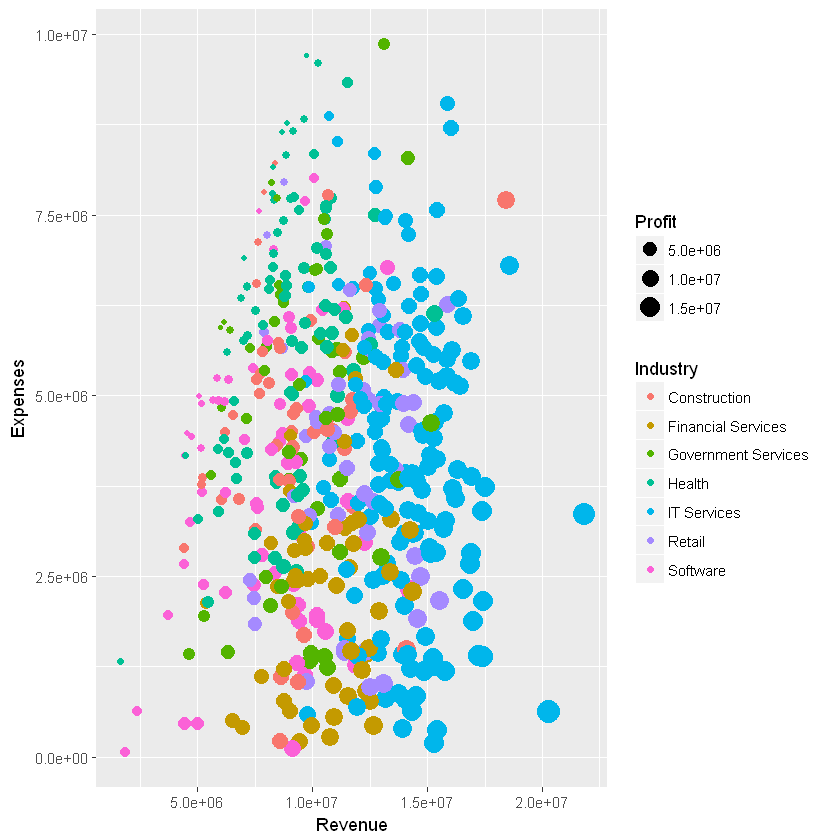

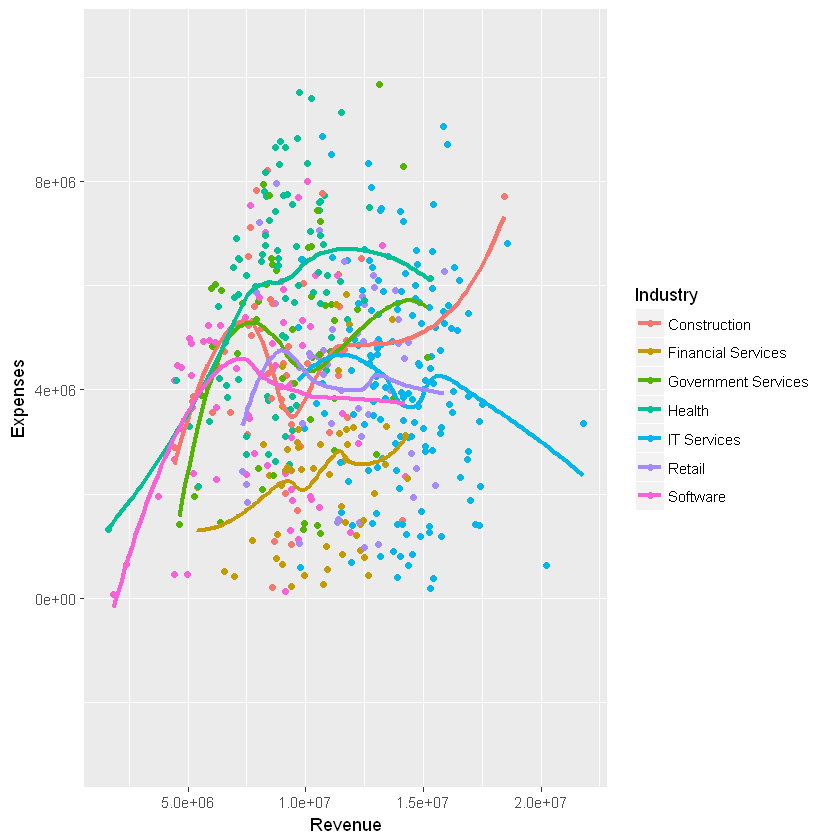

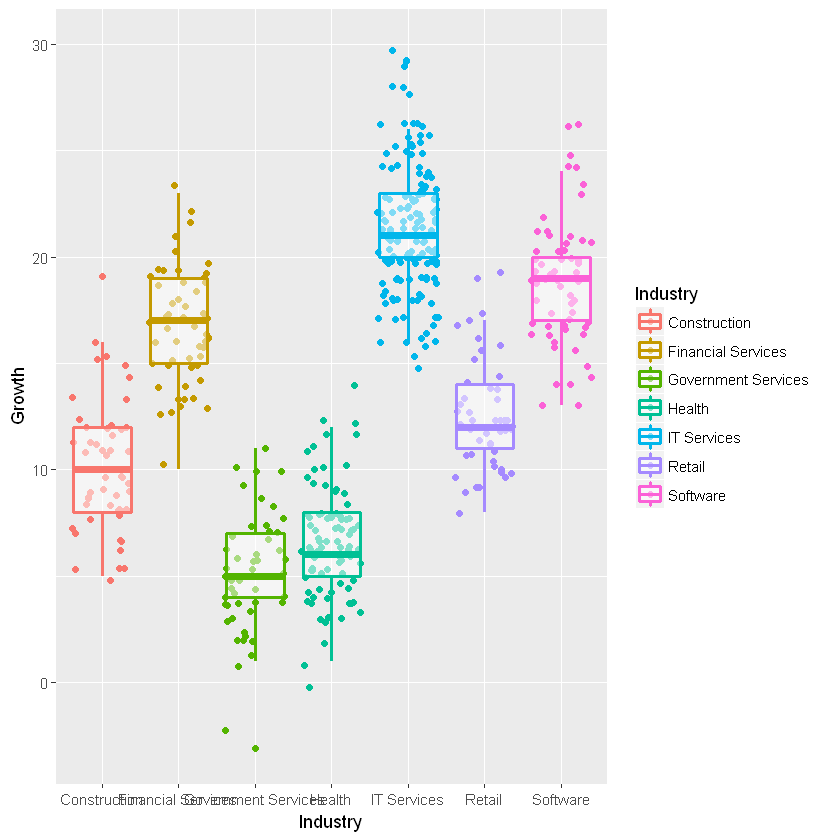

In [157]:
# A scatterplot classified by industry showing revenue, expenses, profit

p = ggplot(data=fin)
p + geom_point(aes(x=Revenue, y=Expenses, colour=Industry, size=Profit))

# A scatterplot that includes industry trends for the expenses~revenue relationship
d = ggplot(data=fin, aes(x=Revenue, y=Expenses, colour=Industry))
d + geom_point() + geom_smooth(fill=NA, size=1.2)
# BoxPlots showing growth by industry

f = ggplot(data=fin, aes(x=Industry, y=Growth, colour=Industry))
f + geom_jitter() + geom_boxplot(size=1, alpha=0.5, outlier.color=NA)

